In [5]:
import pandas as pd
import numpy as np
 
df_train = pd.read_csv("train.csv")
df_train.head()
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']

In [6]:
df_test = pd.read_csv("test.csv")
df_test.head()
X_test = df_test

### Заполним пропуски в числовых признаках

In [7]:
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000
pd.options.display.expand_frame_repr=False


X_train_num = X_train.select_dtypes(exclude=['object'])
X_test_num = X_test.select_dtypes(exclude=['object'])
int_features = X_train_num.columns
print X_train_num.info()
# заполним пропуски Nan в числовых признаках
for i in X_train_num:
    X_train_num[i].fillna(value=np.mean(X_train_num[i]), inplace=True)
    X_test_num[i].fillna(value=np.mean(X_test_num[i]), inplace=True)

X_test_num.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


### Применим One Hot Encoding к категориальным признакам

In [8]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])

X_oh_train = pd.get_dummies(X_train_cat)
X_oh_test = pd.get_dummies(X_test_cat)

X_oh_train, X_oh_test = X_oh_train.align(X_oh_test, join='left', axis=1)
X_oh_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondi

### Соединим числовые и кат. признаки

In [9]:
# Соединяем X_train_num, X_test_num, X_oh_train, X_oh_test
X_num_cat_train = pd.concat([X_train_num, X_oh_train], axis=1)
X_num_cat_test = pd.concat([X_test_num, X_oh_test], axis=1)

In [10]:
from sklearn.metrics import mean_absolute_error
def make_model(model, X_train, X_test, y_train, y_test, columns):
    print X_train.shape, X_test.shape
    print X_test.shape, X_test.shape
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    print ("MAE=", mean_absolute_error(predict, y_test))
    # print pd.DataFrame(columns, [int(i) for i in model.coef_])
    

### Обучим модели линейной регрессии, узнаем значение метрики MAE

In [11]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split

print X_num_cat_train.shape, y_train.shape
X_train, X_test, y_train2, y_test2 = train_test_split(X_num_cat_train, y_train)
lasso, lasso_cv, ridge, ridge_cv=Lasso(), LassoCV(), Ridge(), RidgeCV()

make_model(lasso, X_train, X_test, y_train2, y_test2, X_num_cat_train.columns)
make_model(lasso_cv, X_train, X_test, y_train2, y_test2, X_num_cat_train.columns)
make_model(ridge, X_train, X_test, y_train2, y_test2, X_num_cat_train.columns)
make_model(ridge_cv, X_train, X_test, y_train2, y_test2, X_num_cat_train.columns)

(1460, 289) (1460L,)
(1095, 289) (365, 289)
(365, 289) (365, 289)


C:\Users\misha\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\misha\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


('MAE=', 28247.163460827625)
(1095, 289) (365, 289)
(365, 289) (365, 289)
('MAE=', 27921.97667964654)
(1095, 289) (365, 289)
(365, 289) (365, 289)
('MAE=', 19600.86416176608)
(1095, 289) (365, 289)
(365, 289) (365, 289)
('MAE=', 18390.749139856685)


### Попробуем удалить признаки, имеющие малую корреляцию с SalePrice, посмотрим на результат

In [12]:
# Это относится только к числовым признакам
import seaborn as sns
sns.heatmap(df_train.corr())
print X_train_num.shape

(1460, 37)


In [13]:
d_point = 0.12
low_strs=[]
t=[]
num_features=X_train_num.columns.values

#нижняя строка таблицы корреляции
corr_array=[df_train.corr().iloc[37, i] for i in range(0, 37)]

# список номеров элементов нижней строки корреляции, значение которых < d_point
for i in range(0, 37):
    if corr_array[i]<np.abs(d_point):
        t.append(i)

# Получаем числовые признаки обуччающей выборки (без слабокоррелирующихся с меткой)
num_features[t]=np.nan
num_features = pd.Index(num_features)
num_features=num_features.dropna()
X_highcorr_train_num = X_train_num[num_features]
X_highcorr_test_num = X_test_num[num_features]

# Соединяем обновлённые числовые признаки с категориальными
X_num_cat_train = pd.concat([X_highcorr_train_num, X_oh_train], axis=1)
X_num_cat_test = pd.concat([X_highcorr_test_num, X_oh_test], axis=1)


In [14]:
print X_num_cat_train.shape, y_train.shape
X_train, X_test, y_train2, y_test2 = train_test_split(X_num_cat_train, y_train)
lasso, lasso_cv, ridge, ridge_cv=Lasso(), LassoCV(), Ridge(), RidgeCV()

make_model(lasso, X_train, X_test, y_train2, y_test2, X_num_cat_train.columns)
make_model(lasso_cv, X_train, X_test, y_train2, y_test2, X_num_cat_train.columns)
make_model(ridge, X_train, X_test, y_train2, y_test2, X_num_cat_train.columns)
make_model(ridge_cv, X_train, X_test, y_train2, y_test2, X_num_cat_train.columns)

(1460, 275) (1460L,)
(1095, 275) (365, 275)
(365, 275) (365, 275)
('MAE=', 19772.0537935039)
(1095, 275) (365, 275)
(365, 275) (365, 275)
('MAE=', 24035.48781254701)
(1095, 275) (365, 275)
(365, 275) (365, 275)
('MAE=', 19109.452832221214)
(1095, 275) (365, 275)
(365, 275) (365, 275)
('MAE=', 18440.306547641136)


#### улучшение только для ridge и ridge_cv
Lasso: 16633->18240
LassoCV: 22273->24526
Ridge: 18176->17519
RidgeCV: 17841->16329

### Подберем параметры по сетке для Ridge

17054.741022548616


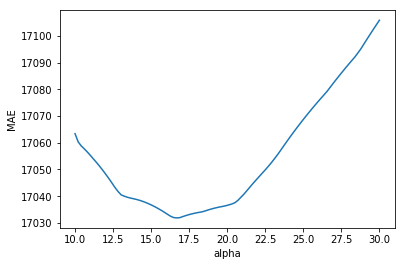

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
import numpy as np
alpha=np.linspace(10, 30, 100)
mae = []
X_train, X_test, y_train2, y_test2 = train_test_split(X_num_cat_train, \
                                                      y_train, random_state=17)
# Построим зависимость MAE от alpha для Ridge
for i in alpha:
    ridge=Ridge(alpha=i, random_state=17)
    ridge.fit(X_train, y_train2)
    predict = ridge.predict(X_test)
    mae.append(mean_absolute_error(predict, y_test2))
    # print int(mean_absolute_error(predict, y_test)), i
x_, y_ = alpha, mae
plt.xlabel(u"alpha")
plt.ylabel("MAE")
plt.plot(x_, y_);
print np.mean(mae)

### Отобразим на графике зависимость MAE от alpha для Lasso:

16656.729686723356


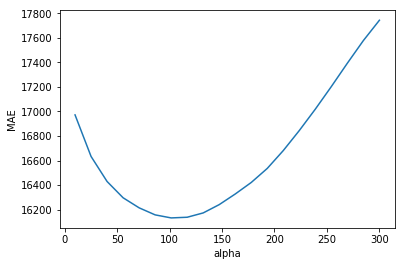

In [17]:
alpha=np.linspace(10, 300, 20)
mae = []
X_train, X_test, y_train2, y_test2 = train_test_split(X_num_cat_train,\
                                                      y_train, random_state=17)
# Построим зависимость MAE от alpha для Lasso
for i in alpha:
    lasso=Lasso(alpha=i, random_state=17)
    lasso.fit(X_train, y_train2)
    predict = lasso.predict(X_test)
    mae.append(mean_absolute_error(predict, y_test2))
    # print int(mean_absolute_error(predict, y_test2)), i
x_, y_ = alpha, mae
plt.xlabel(u"alpha")
plt.ylabel("MAE")
plt.plot(x_, y_);
print np.mean(mae)

### Отмасштабируем количественные признаки, и попробуем еще раз обучить с лучшей alpha

In [18]:
from sklearn.preprocessing import StandardScaler

# Берём из выборки с признаками, только имеющими значительную корреляцию с SalePrice
scaler = StandardScaler()

X_highcorr_train_num_scaled=pd.DataFrame(scaler.fit_transform(X_highcorr_train_num), \
                                         columns=X_highcorr_train_num.columns)

X_highcorr_test_num_scaled=pd.DataFrame(scaler.fit_transform(X_highcorr_test_num), \
                                       columns=X_highcorr_test_num.columns)

#Соединим с остальными признаками
X_numscaled_cat_train = pd.concat([X_highcorr_train_num_scaled, X_oh_train], axis=1)
X_numscaled_cat_test = pd.concat([X_highcorr_test_num_scaled, X_oh_test], axis=1)

C:\Users\misha\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\misha\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
# Обучим снова на Lasso:
X_train, X_test, y_train2, y_test2 = train_test_split(X_numscaled_cat_train, y_train, random_state=17)
lasso=Lasso(alpha=101.57, random_state=17)
lasso.fit(X_train, y_train2)
predict = lasso.predict(X_test)
print "MAE=", mean_absolute_error(predict, y_test2)


MAE= 16135.992237726288


16965 10.0
16634 25.263157894736842
16436 40.526315789473685
16319 55.78947368421053
16224 71.05263157894737
16161 86.31578947368422
16135 101.57894736842105
16141 116.84210526315789
16185 132.10526315789474
16249 147.3684210526316
16338 162.63157894736844
16448 177.89473684210526
16567 193.1578947368421
16697 208.42105263157896
16865 223.68421052631578
17049 238.94736842105263
17237 254.21052631578948
17439 269.4736842105263
17624 284.7368421052632
17780 300.0
16135.992940601229


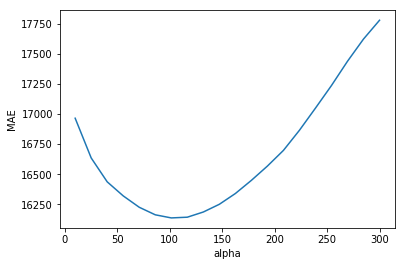

In [31]:
alpha=np.linspace(10, 300, 20)
mae = []
X_train, X_test, y_train2, y_test2 = train_test_split(X_numscaled_cat_train,\
                                                      y_train, random_state=17)
# Построим зависимость MAE от alpha для Lasso
for i in alpha:
    lasso=Lasso(alpha=i, random_state=17)
    lasso.fit(X_train, y_train2)
    predict = lasso.predict(X_test)
    mae.append(mean_absolute_error(predict, y_test2))
    print int(mean_absolute_error(predict, y_test2)), i
x_, y_ = alpha, mae
plt.xlabel(u"alpha")
plt.ylabel("MAE")
plt.plot(x_, y_);
print np.min(mae)

### Лучшее значение alpha=101

17404 2.0
17206 5.282051282051282
17102 8.564102564102564
17061 11.846153846153847
17048 15.128205128205128
17046 18.41025641025641
17058 21.692307692307693
17082 24.974358974358974
17112 28.256410256410255
17142 31.538461538461537
17172 34.82051282051282
17200 38.1025641025641
17230 41.38461538461539
17260 44.666666666666664
17289 47.94871794871795
17316 51.230769230769226
17342 54.51282051282051
17369 57.794871794871796
17394 61.07692307692307
17417 64.35897435897436
17441 67.64102564102564
17465 70.92307692307692
17490 74.2051282051282
17513 77.48717948717949
17536 80.76923076923077
17558 84.05128205128204
17578 87.33333333333333
17598 90.61538461538461
17616 93.8974358974359
17634 97.17948717948718
17653 100.46153846153845
17670 103.74358974358974
17687 107.02564102564102
17705 110.3076923076923
17723 113.58974358974359
17742 116.87179487179486
17760 120.15384615384615
17778 123.43589743589743
17794 126.71794871794872
17811 130.0
17046.284081975653


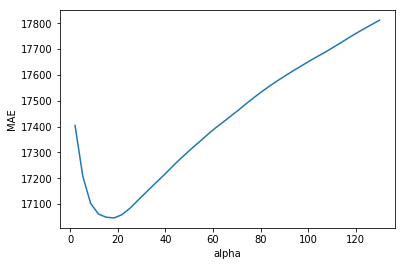

In [26]:
# Обучим снова на Ridge
alpha=np.linspace(2, 130, 40)
mae = []
X_train, X_test, y_train2, y_test2 = train_test_split(X_numscaled_cat_train,\
                                                      y_train, random_state=17)
# Построим зависимость MAE от alpha для Ridge
for i in alpha:
    ridge=Ridge(alpha=i, random_state=17)
    ridge.fit(X_train, y_train2)
    predict = ridge.predict(X_test)
    mae.append(mean_absolute_error(predict, y_test2))
    print int(mean_absolute_error(predict, y_test2)), i
x_, y_ = alpha, mae
plt.xlabel(u"alpha")
plt.ylabel("MAE")
plt.plot(x_, y_);
print np.min(mae)

### Лучшее значение alpha для Ridge: 18

In [21]:
def make_submission(ID, predict):
    df_sub = pd.DataFrame({'Id': ID, 'SalePrice':predict}, columns=['Id', 'SalePrice'])
    print df_sub
    df_sub.to_csv("submission.csv", index=False)

In [22]:
# Обучим Lasso-модель с выбранным параметром alpha=101
clf = Lasso(alpha=101, random_state=17)
clf.fit(X_numscaled_cat_train, y_train)
X_numscaled_cat_test.fillna(0, inplace=True)
predict=clf.predict(X_numscaled_cat_test)
#print pd.DataFrame(X_numscaled_cat_test).head(1)
#print pd.DataFrame(X_numscaled_cat_train).head(1)

In [91]:
# Создадим 
make_submission(df_test['Id'], predict)

        Id      SalePrice
0     1461  112443.964569
1     1462  161995.896178
2     1463  185274.050545
3     1464  192762.654622
4     1465  201622.501168
5     1466  176665.793711
6     1467  179095.935244
7     1468  163976.308276
8     1469  211167.210619
9     1470  124084.872375
10    1471  181642.691899
11    1472  104059.278884
12    1473   94026.523879
13    1474  142328.771791
14    1475  101165.526486
15    1476  373759.469862
16    1477  253913.253091
17    1478  315465.858260
18    1479  312220.359808
19    1480  464156.216667
20    1481  313143.110432
21    1482  213980.415597
22    1483  177648.714326
23    1484  159583.596569
24    1485  195304.264023
25    1486  201468.776676
26    1487  334131.503656
27    1488  238032.532599
28    1489  199676.862070
29    1490  242069.658343
30    1491  201142.102635
31    1492   92259.505622
32    1493  210336.155774
33    1494  305832.821368
34    1495  297950.268845
35    1496  245356.102785
36    1497  176302.103950
37    1498  

In [92]:
print pd.read_csv("submission.csv")

        Id      SalePrice
0     1461  112443.964569
1     1462  161995.896178
2     1463  185274.050545
3     1464  192762.654622
4     1465  201622.501168
5     1466  176665.793711
6     1467  179095.935244
7     1468  163976.308276
8     1469  211167.210619
9     1470  124084.872375
10    1471  181642.691899
11    1472  104059.278884
12    1473   94026.523879
13    1474  142328.771791
14    1475  101165.526486
15    1476  373759.469862
16    1477  253913.253091
17    1478  315465.858260
18    1479  312220.359808
19    1480  464156.216667
20    1481  313143.110432
21    1482  213980.415597
22    1483  177648.714326
23    1484  159583.596569
24    1485  195304.264023
25    1486  201468.776676
26    1487  334131.503656
27    1488  238032.532599
28    1489  199676.862070
29    1490  242069.658343
30    1491  201142.102635
31    1492   92259.505622
32    1493  210336.155774
33    1494  305832.821368
34    1495  297950.268845
35    1496  245356.102785
36    1497  176302.103950
37    1498  

### Результат на Kaggle
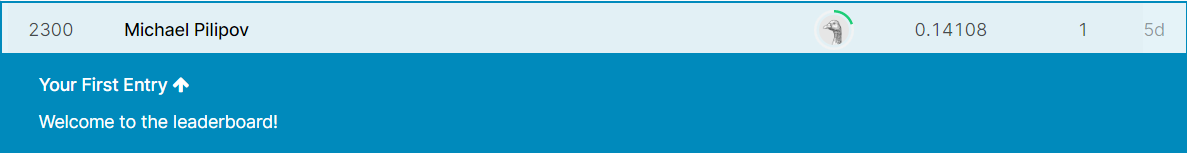

In [27]:
# Обучим Ridge-модель с выбранным параметром alpha=18
clf = Ridge(alpha=18, random_state=17)
clf.fit(X_numscaled_cat_train, y_train)
X_numscaled_cat_test.fillna(0, inplace=True)
predict=clf.predict(X_numscaled_cat_test)

In [28]:
make_submission(df_test['Id'], predict)

        Id      SalePrice
0     1461  102785.249951
1     1462  161342.332564
2     1463  181708.633230
3     1464  189276.848280
4     1465  197424.019412
5     1466  175009.384832
6     1467  176259.632212
7     1468  163077.651952
8     1469  206730.911568
9     1470  125042.561703
10    1471  174976.411525
11    1472  105042.831127
12    1473   93525.886530
13    1474  146942.233093
14    1475  103193.042446
15    1476  362585.852831
16    1477  255594.963439
17    1478  317572.309790
18    1479  320162.215465
19    1480  456916.625900
20    1481  315650.876071
21    1482  222053.197733
22    1483  176125.949079
23    1484  169570.955069
24    1485  209417.837224
25    1486  201532.100979
26    1487  329972.625678
27    1488  239241.027564
28    1489  195401.954967
29    1490  237416.975991
30    1491  206620.403894
31    1492   92808.530446
32    1493  222718.369812
33    1494  307090.207105
34    1495  287049.708224
35    1496  247605.612647
36    1497  171193.089623
37    1498  

### Результат на Kaggle
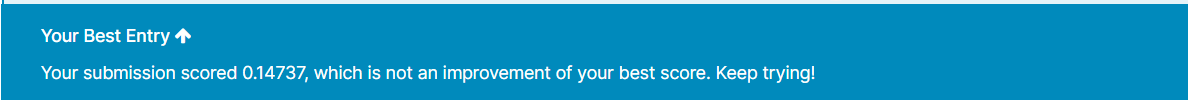
##### Таким образом, Lasso оказался лучше (0.14108)

#### Попробуем обучить модели без масштабирования признаков

In [32]:
# Обучим Lasso-модель с выбранным параметром alpha=101, на данных без масштабирования числовых признаков
clf = Lasso(alpha=101, random_state=17)
clf.fit(X_num_cat_train, y_train)
X_num_cat_test.fillna(0, inplace=True)
predict=clf.predict(X_num_cat_test)

In [34]:
make_submission(df_test['Id'], predict)

        Id      SalePrice
0     1461  112184.067415
1     1462  158624.323760
2     1463  181132.591673
3     1464  189881.526982
4     1465  202448.837839
5     1466  173187.282786
6     1467  179014.942142
7     1468  160989.115705
8     1469  209274.958824
9     1470  123500.488901
10    1471  182224.303655
11    1472  104420.062594
12    1473   93874.800189
13    1474  141649.771094
14    1475  104413.181057
15    1476  368616.984160
16    1477  252023.836569
17    1478  312944.929288
18    1479  307701.488318
19    1480  460484.871313
20    1481  307115.100097
21    1482  213443.991464
22    1483  173398.606660
23    1484  160586.970893
24    1485  190390.964882
25    1486  198870.784178
26    1487  326775.313006
27    1488  237679.419621
28    1489  199307.905918
29    1490  240367.774069
30    1491  196876.505149
31    1492   91446.177803
32    1493  206530.102824
33    1494  301558.951626
34    1495  292934.860005
35    1496  246289.600241
36    1497  176465.048678
37    1498  

### Результат на Kaggle
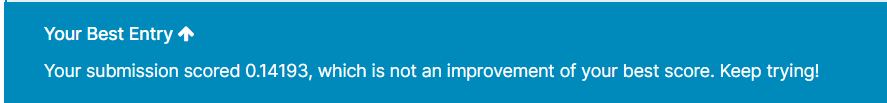
##### Таким образом, масштабирование признаков в предыдущей модели Lasso дало улучшение в модели (0.14108 вместо 0.14193)

In [35]:
# Обучим Ridge-модель с выбранным параметром alpha=101, на данных без масштабирования числовых признаков
clf = Ridge(alpha=18, random_state=17)
clf.fit(X_num_cat_train, y_train)
X_num_cat_test.fillna(0, inplace=True)
predict=clf.predict(X_num_cat_test)

In [36]:
make_submission(df_test['Id'], predict)

        Id      SalePrice
0     1461  100555.450516
1     1462  157631.922834
2     1463  176772.175229
3     1464  185964.641284
4     1465  199034.663105
5     1466  171627.757477
6     1467  175855.523078
7     1468  160131.707830
8     1469  206113.330607
9     1470  123884.503788
10    1471  174370.668589
11    1472  105797.776561
12    1473   93277.268655
13    1474  146848.121317
14    1475  107355.708805
15    1476  358023.097489
16    1477  253818.208784
17    1478  315926.528327
18    1479  316539.000274
19    1480  451382.086239
20    1481  310317.806094
21    1482  222578.771058
22    1483  171114.495695
23    1484  171300.362566
24    1485  205108.258783
25    1486  198502.996695
26    1487  322851.455695
27    1488  239291.732074
28    1489  195560.973835
29    1490  235251.846174
30    1491  202198.563512
31    1492   91564.628072
32    1493  218804.649282
33    1494  302929.487657
34    1495  282962.146592
35    1496  248193.040393
36    1497  172141.298233
37    1498  

### Результат на Kaggle
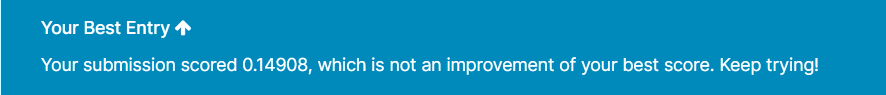
#### Для Ridge также масштабирование признаков дало результат (0.14737 вместо 0.14908)